<a href="https://www.kaggle.com/code/nitindiwakar/titanic-eda?scriptVersionId=101370212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

You should construct your machine learning models using the training set. We give each passengers outcome (often referred to as the ground reality) for the training set. Your model will be based on "features" like the class and gender of the passengers. In order to develop new features, feature engineering can also be used.

You should evaluate your models performance on unobserved data using the test set. We do not give each passengers ground truth for the test set. Your responsibility is to foresee these outcomes. Use the model you trained to forecast whether each test set passenger survived the Titanics sinking for each passenger in the test set.

Variable Notes

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/titanic/train.csv
../input/titanic/test.csv
../input/titanic/gender_submission.csv


# **Importing the essential modules**

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display

In [5]:
train = pd.read_csv("../input/titanic/train.csv") 
test = pd.read_csv("../input/titanic/test.csv")

# **Display Top 10 data of train and test**

In [7]:
display(train.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
display(test.head(10))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [13]:
#number of column in test and train
print("Number of column in train:",train.shape[1], " Number of column in test:", test.shape[1])

Number of column in train: 12  Number of column in test: 11


In [14]:
#number of rows in train and test
print("Number of rows in train:",train.shape[0], "Number of rows in test:",test.shape[0])

Number of rows in train: 891 Number of rows in test: 418


# **Data Cleaning**
1. Removing null values
2. Removing unwanted column
3. Formatting the column
4. Added new column according to need

In [15]:
def null_value(df):
    percentage = ((df.isna().sum()/df.isna().count())*100).sort_values(ascending = False)
    count = (df.isna().sum()).sort_values(ascending = False)
    diff= pd.concat([count,percentage],axis = 1, keys = ["Count", "Percentage"])
    return diff

In [16]:
null_value(train)

,Count,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [17]:
null_value(test)

,Count,Percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [18]:
#dropping the column cabin because it has more percentage of null and the cabin can be found from the fare rate and pclass
train.drop("Cabin",axis = 1,inplace = True)
test.drop("Cabin",axis=1, inplace = True)

In [19]:
#fill up or replace the null in the age with the mean of age
train["Age"].replace(np.nan, train["Age"].mean(), inplace = True)
train["Embarked"].replace(np.nan, train["Embarked"].mode()[0], inplace = True)
train["Age"].isna().sum(), train["Embarked"].isna().sum()

(0, 0)

In [20]:
test["Age"].replace(np.nan, test["Age"].mean(),inplace = True)
test["Fare"].replace(np.nan, test["Fare"].mode()[0],inplace = True)
test["Age"].isna().sum(), test["Fare"].isna().sum()

(0, 0)

In [21]:
#Dropping of the Name and the passenger ticket because both has no recurring pattern
train.drop(["Name","Ticket"], axis =1, inplace = True)
test.drop(["Name","Ticket"],axis = 1, inplace = True)

**Visualization of Sex and the Survival count**

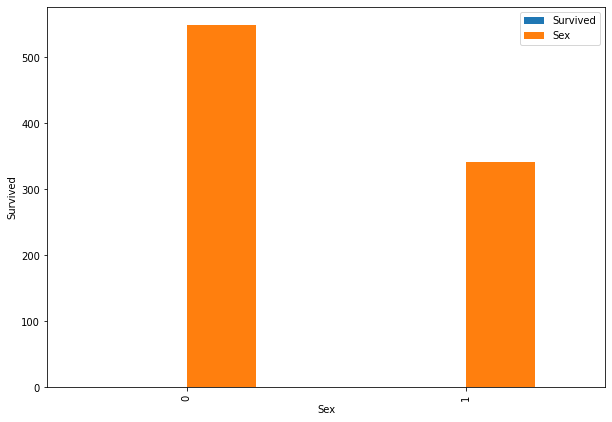

In [22]:
dd = train[["Sex","Survived"]].groupby(["Survived"], as_index = False).count()
dd.plot(kind = "bar",figsize = (10,7))
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()

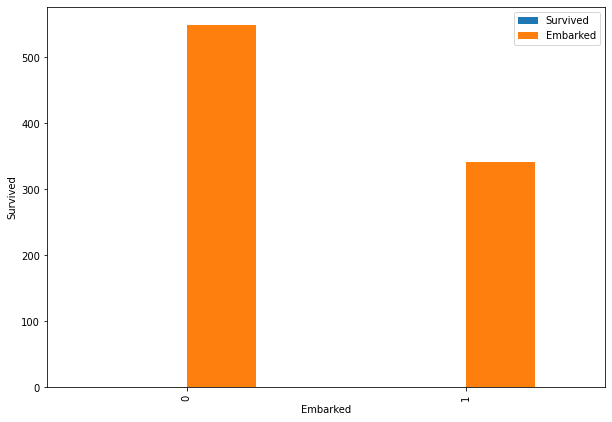

In [23]:
dd = train[["Embarked","Survived"]].groupby(["Survived"], as_index = False).count()
dd.plot(kind = "bar",figsize = (10,7))
plt.xlabel("Embarked")
plt.ylabel("Survived")
plt.show()

As we can see that both **Sex** and **Embarked** shows a great dependacy/relationship to the target.

In [24]:
#formating the columns of Sex and Embarked
train = pd.get_dummies(train, prefix = ["Sex","Embarked"])
test = pd.get_dummies(test, prefix = ["Sex","Embarked"])

In [25]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [26]:
#combining the SibSp and Parch
def merge(df):
    rel = []
    for i in df["SibSp"].values.tolist():
        rel.append(i)
    rel1 = []
    for i in df["Parch"].values.tolist():
        rel1.append(i)
        
    concat = []
    for index in range(len(rel)):
        concat.append(rel[index] + rel1[index])
        
    df1 = pd.DataFrame(concat, columns = ["Relatives"])
    df = pd.concat([df,df1], axis = 1)
    return df

In [27]:
train = merge(train)

In [28]:
train.drop(["SibSp","Parch"],axis=1, inplace = True)

In [29]:
train.loc[888]

PassengerId    889.000000
Survived         0.000000
Pclass           3.000000
Age             29.699118
Fare            23.450000
Sex_female       1.000000
Sex_male         0.000000
Embarked_C       0.000000
Embarked_Q       0.000000
Embarked_S       1.000000
Relatives        3.000000
Name: 888, dtype: float64

In [30]:
test = merge(test)
test.drop(["SibSp","Parch"],axis = 1, inplace = True)

In [31]:
test.head()

,PassengerId,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Relatives
0,892,3,34.5,7.8292,0,1,0,1,0,0
1,893,3,47.0,7.0000,1,0,0,0,1,1
2,894,2,62.0,9.6875,0,1,0,1,0,0
3,895,3,27.0,8.6625,0,1,0,0,1,0
4,896,3,22.0,12.2875,1,0,0,0,1,2


# **Feature Importance using ExtraTreeClassifier**

In [32]:
x = train.drop("Survived",axis = 1)
y = train["Survived"]

In [33]:
#model object creation and fitting
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

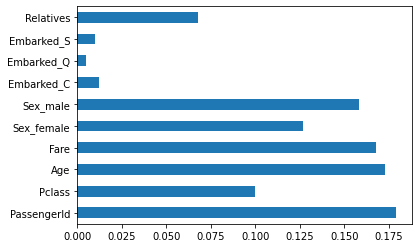

In [34]:
ft = pd.Series(model.feature_importances_, index = x.columns)
ft.plot(kind = "barh")
plt.show()

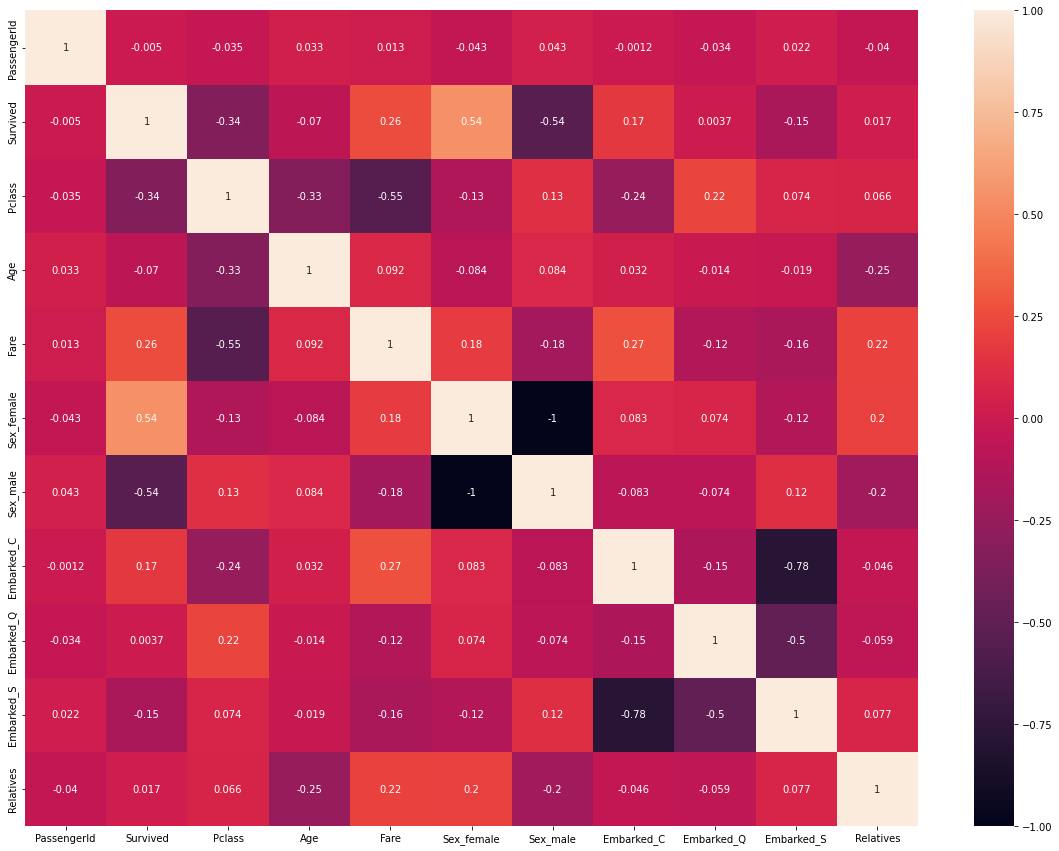

In [35]:
#heatmap for correlation between feature
plt.figure(figsize = (20,15))
sns.heatmap(train.corr(),annot = True)
plt.show()

In [36]:
#Dropping passengerId as we can see the correlation of passengerId is near to zero with respect to Survived
train.drop("PassengerId",axis = 1,inplace = True)

# **Data Preprocessing**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
test = StandardScaler().fit_transform(test)

**Logistic Regression**

In [38]:
lr = LogisticRegression()
params = { "penalty": ("l1", "l2", "elasticnet"), "tol": (0.1, 0.01, 0.001, 0.0001), "C": (10.0, 1.0, 0.1, 0.01)}
modelLR = GridSearchCV(lr, params, cv=10)
modelLR.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': (10.0, 1.0, 0.1, 0.01),
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'tol': (0.1, 0.01, 0.001, 0.0001)})

In [39]:
print(accuracy_score(modelLR.predict(X_test),y_test))

0.8100558659217877


**Support Vector Machine(SVM)**

In [40]:
modelSVM = svm.SVC(kernel = "rbf")
modelSVM.fit(X_train,y_train)

SVC()

In [41]:
print(accuracy_score(modelSVM.predict(X_test),y_test))

0.8212290502793296


**DecisionTreeClassifier**

In [42]:
modelDTC = DecisionTreeClassifier(criterion="entropy")
modelDTC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
print(accuracy_score(modelDTC.predict(X_test),y_test))

0.7541899441340782


**KNeighborsClassifier**

In [44]:
modelKNC = KNeighborsClassifier(n_neighbors=4)
modelKNC.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [45]:
print(accuracy_score(modelKNC.predict(X_test),y_test))

0.8100558659217877


In [46]:
report = pd.DataFrame({
    "Model": ["LogisticRegression","SVM","DecisionTreeClassifier","KNeighborsClassifier"],
    "Accuracy": [accuracy_score(modelLR.predict(X_test),y_test),accuracy_score(modelSVM.predict(X_test),y_test),
                  accuracy_score(modelDTC.predict(X_test),y_test),accuracy_score(modelKNC.predict(X_test),y_test)]
})

In [47]:
report.sort_values(by = "Accuracy")

,Model,Accuracy
2,DecisionTreeClassifier,0.754190
0,LogisticRegression,0.810056
3,KNeighborsClassifier,0.810056
1,SVM,0.821229


# Test Data Prediction

**Using SVM as it has a better accuracy than other**

In [48]:
pred = modelSVM.predict(test)

In [49]:
x = pd.read_csv("../input/titanic/test.csv")
prediction = pd.DataFrame({"PassengerId":x["PassengerId"], "Survived": pred})

In [50]:
prediction.sample(10)

,PassengerId,Survived
271,1163,0
283,1175,1
369,1261,0
185,1077,0
12,904,1
129,1021,0
206,1098,1
40,932,0
216,1108,1
358,1250,0


### You can also use feature selection module from [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) to know the best feature for better accuracy.
### Such as: SelectKBest -> Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator

In [ ]:
prediction.to_csv("submission.csv")

>**Inspired by one of the contributor of this competition**